### 데이터 전처리

#### 주식형 펀드 전처리

In [59]:
import pandas as pd

# 주식형 펀드 파일 불러오기
fund_df = pd.read_excel('./excel/주식형펀드/미래에셋3억만들기솔로몬증권투자신탁1호(주식)_가격변동추이_20220728.xls')
fund_df.head(5)

,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,벤치마크지수,벤치마크지수.1,벤치마크지수.2,벤치마크지수.3,벤치마크지수.4
0,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,KOSPI,KOSPI200,KOSDAQ,국공채(3년만기),회사채(3년만기)
1,2022/07/01,983.32,-16.58,1014.15,83953,2305.42,304.02,729.48,3.439,4.691
2,2022/06/30,999.9,-18,1014.14,84373,2332.64,307.2,745.44,3.552,4.794
3,2022/06/29,1017.9,10.85,1011.44,84396,2377.99,312.66,762.35,3.552,4.793
4,2022/06/28,1007.05,15.74,1011.44,84403,2422.09,319.11,769.51,3.552,4.793


In [60]:
# 필요한 컬럼만 남긴다
# 기준일자, 기준가격, 전일대비\n등락, 벤치마크지수
fund_df = fund_df[["기준일자", "기준가격", "벤치마크지수"]]
fund_df.head()

,기준일자,기준가격,벤치마크지수
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [61]:
# 컬럼명 변경
fund_df.rename(columns={"벤치마크지수" : "KOSPI"}, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [62]:
# 불필요 행 제거
fund_df = fund_df.loc[1:]
fund_df.head()

,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09
5,2022/06/27,991.31,2401.92


In [63]:
# 기준일자 오름차순으로 변경
fund_df.sort_values("기준일자", ascending=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
765,2019/06/03,895.87,2067.85
764,2019/06/04,904.98,2066.97
763,2019/06/05,903.08,2069.11
762,2019/06/07,906.01,2072.33
761,2019/06/10,909.27,2099.49


In [64]:
# 인덱스 재설정
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,2019/06/03,895.87,2067.85
1,2019/06/04,904.98,2066.97
2,2019/06/05,903.08,2069.11
3,2019/06/07,906.01,2072.33
4,2019/06/10,909.27,2099.49


In [65]:
# 기준월 컬럼 생성
fund_df["기준일자"] = fund_df["기준일자"].str.replace("/", "")
fund_df["기준월"] = fund_df["기준일자"].astype(str).str[:6]
fund_df.head()

,기준일자,기준가격,KOSPI,기준월
0,20190603,895.87,2067.85,201906
1,20190604,904.98,2066.97,201906
2,20190605,903.08,2069.11,201906
3,20190607,906.01,2072.33,201906
4,20190610,909.27,2099.49,201906


In [66]:
# 일별수익률 컬럼 생성 및 계산
fund_df["일별수익률"] = fund_df["기준가격"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률
0,20190603,895.87,2067.85,201906,NaN
1,20190604,904.98,2066.97,201906,0.010169
2,20190605,903.08,2069.11,201906,-0.002099
3,20190607,906.01,2072.33,201906,0.003244
4,20190610,909.27,2099.49,201906,0.003598


In [67]:
# KOSPI 일별수익률 컬럼 생성 및 계산
fund_df["KOSPI 일별수익률"] = fund_df["KOSPI"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190603,895.87,2067.85,201906,NaN,NaN
1,20190604,904.98,2066.97,201906,0.010169,-0.000426
2,20190605,903.08,2069.11,201906,-0.002099,0.001035
3,20190607,906.01,2072.33,201906,0.003244,0.001556
4,20190610,909.27,2099.49,201906,0.003598,0.013106


In [68]:
# 결측치 제거
fund_df.dropna(inplace=True)
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190604,904.98,2066.97,201906,0.010169,-0.000426
1,20190605,903.08,2069.11,201906,-0.002099,0.001035
2,20190607,906.01,2072.33,201906,0.003244,0.001556
3,20190610,909.27,2099.49,201906,0.003598,0.013106
4,20190611,918.61,2111.82,201906,0.010272,0.005873


In [69]:
fund_df.dtypes

기준일자            object
기준가격            object
KOSPI           object
기준월             object
일별수익률          float64
KOSPI 일별수익률    float64
dtype: object

In [70]:
# 기준일자별 마지막 날짜
monthly_last_day = fund_df.groupby(["기준월"])["기준일자"].max()
monthly_last_day = pd.DataFrame(monthly_last_day)
monthly_last_day

,기준일자
기준월,
201906,20190628
201907,20190731
201908,20190830
201909,20190930
201910,20191031
201911,20191129
201912,20191231
202001,20200131
202002,20200228


In [71]:
fund_df.drop(["일별수익률", "KOSPI 일별수익률"], axis=1, inplace=True)

In [72]:
df = pd.merge(monthly_last_day, fund_df, how="left", on="기준일자")
df

,기준일자,기준가격,KOSPI,기준월
0,20190628,927.94,2130.62,201906
1,20190731,892.02,2030.05,201907
2,20190830,868.3,1967.79,201908
3,20190930,925.39,2063.05,201909
4,20191031,928.09,2083.48,201910
5,20191129,931.71,2089.8,201911
6,20191231,989.23,2197.67,201912
7,20200131,967.43,2131.08,202001
8,20200228,940.15,1987.01,202002
9,20200331,797.9,1754.64,202003


In [73]:
# 월별수익률 컬럼 생성
df["월별수익률"] = df["기준가격"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률
0,20190628,927.94,2130.62,201906,NaN
1,20190731,892.02,2030.05,201907,-0.038709
2,20190830,868.3,1967.79,201908,-0.026591
3,20190930,925.39,2063.05,201909,0.065749
4,20191031,928.09,2083.48,201910,0.002918


In [74]:
# KOSPI 월별수익률 컬럼 생성
df["KOSPI 월별수익률"] = df["KOSPI"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률
0,20190628,927.94,2130.62,201906,NaN,NaN
1,20190731,892.02,2030.05,201907,-0.038709,-0.047202
2,20190830,868.3,1967.79,201908,-0.026591,-0.030669
3,20190930,925.39,2063.05,201909,0.065749,0.048410
4,20191031,928.09,2083.48,201910,0.002918,0.009903


In [75]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률
0,20190731,892.02,2030.05,201907,-0.038709,-0.047202
1,20190830,868.3,1967.79,201908,-0.026591,-0.030669
2,20190930,925.39,2063.05,201909,0.065749,0.048410
3,20191031,928.09,2083.48,201910,0.002918,0.009903
4,20191129,931.71,2089.8,201911,0.003900,0.003033


In [76]:
# 월별수익률을 사용한 3년 수익률 표준편차
year3_std = df["월별수익률"].std(ddof=0)
df["3년 표준편차"] = year3_std
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률,3년 표준편차
0,20190731,892.02,2030.05,201907,-0.038709,-0.047202,0.056548
1,20190830,868.3,1967.79,201908,-0.026591,-0.030669,0.056548
2,20190930,925.39,2063.05,201909,0.065749,0.048410,0.056548
3,20191031,928.09,2083.48,201910,0.002918,0.009903,0.056548
4,20191129,931.71,2089.8,201911,0.003900,0.003033,0.056548


In [77]:
# KOSPI 월별수익률을 사용한 KOSPI 3년 수익률 표준편차
kospi_year3_std = df["KOSPI 월별수익률"].std(ddof=0)
df["KOSPI 3년 표준편차"] = kospi_year3_std
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률,3년 표준편차,KOSPI 3년 표준편차
0,20190731,892.02,2030.05,201907,-0.038709,-0.047202,0.056548,0.057454
1,20190830,868.3,1967.79,201908,-0.026591,-0.030669,0.056548,0.057454
2,20190930,925.39,2063.05,201909,0.065749,0.048410,0.056548,0.057454
3,20191031,928.09,2083.48,201910,0.002918,0.009903,0.056548,0.057454
4,20191129,931.71,2089.8,201911,0.003900,0.003033,0.056548,0.057454


In [78]:
df = df[["기준일자", "기준가격", "KOSPI", "기준월", "월별수익률", "3년 표준편차", "KOSPI 월별수익률", "KOSPI 3년 표준편차"]]
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,3년 표준편차,KOSPI 월별수익률,KOSPI 3년 표준편차
0,20190731,892.02,2030.05,201907,-0.038709,0.056548,-0.047202,0.057454
1,20190830,868.3,1967.79,201908,-0.026591,0.056548,-0.030669,0.057454
2,20190930,925.39,2063.05,201909,0.065749,0.056548,0.048410,0.057454
3,20191031,928.09,2083.48,201910,0.002918,0.056548,0.009903,0.057454
4,20191129,931.71,2089.8,201911,0.003900,0.056548,0.003033,0.057454


#### CD금리 전처리

In [79]:
import pandas as pd

# 월별 CD금리 파일 불러오기
cd_df = pd.read_csv('./csv/월별_CD금리.csv')
cd_df.head()

,변환,원자료
0,2019/07,1.68
1,2019/08,1.49
2,2019/09,1.54
3,2019/10,1.46
4,2019/11,1.52


In [80]:
# df 복사
fund_cd_df = df.copy()

In [81]:
# CD금리 컬럼 추가
fund_cd_df["CD금리"] = cd_df["원자료"]
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,3년 표준편차,KOSPI 월별수익률,KOSPI 3년 표준편차,CD금리
0,20190731,892.02,2030.05,201907,-0.038709,0.056548,-0.047202,0.057454,1.68
1,20190830,868.3,1967.79,201908,-0.026591,0.056548,-0.030669,0.057454,1.49
2,20190930,925.39,2063.05,201909,0.065749,0.056548,0.048410,0.057454,1.54
3,20191031,928.09,2083.48,201910,0.002918,0.056548,0.009903,0.057454,1.46
4,20191129,931.71,2089.8,201911,0.003900,0.056548,0.003033,0.057454,1.52


In [82]:
fund_cd_df["CD금리"] = fund_cd_df["CD금리"].mean()

In [83]:
fund_cd_df["CD금리"] = fund_cd_df["CD금리"]/100

In [84]:
fund_cd_df.dropna(inplace=True)
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,3년 표준편차,KOSPI 월별수익률,KOSPI 3년 표준편차,CD금리
0,20190731,892.02,2030.05,201907,-0.038709,0.056548,-0.047202,0.057454,0.011192
1,20190830,868.3,1967.79,201908,-0.026591,0.056548,-0.030669,0.057454,0.011192
2,20190930,925.39,2063.05,201909,0.065749,0.056548,0.048410,0.057454,0.011192
3,20191031,928.09,2083.48,201910,0.002918,0.056548,0.009903,0.057454,0.011192
4,20191129,931.71,2089.8,201911,0.003900,0.056548,0.003033,0.057454,0.011192


### 정규성 검정

In [85]:
from scipy.stats import shapiro
import numpy as np

shapiro(fund_cd_df["월별수익률"])

ShapiroResult(statistic=0.9479657411575317, pvalue=0.0829838439822197)

d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

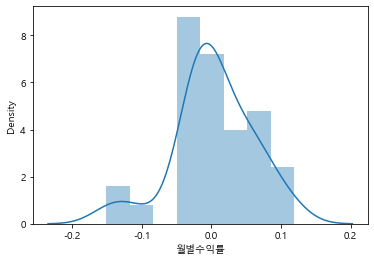

In [86]:
# 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(fund_cd_df["월별수익률"])

d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

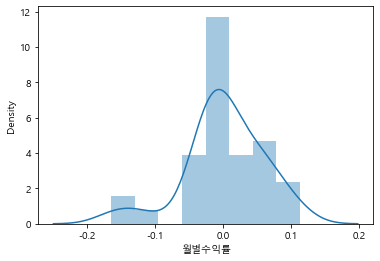

In [87]:
sns.distplot(np.log1p(fund_cd_df["월별수익률"]))

((array([-2.0844567 , -1.69509426, -1.46257551, -1.28983027, -1.14880688,
         -1.0275498 , -0.91978012, -0.82175965, -0.73106454, -0.646021  ,
         -0.56541462, -0.48832761, -0.41404133, -0.34197479, -0.27164383,
         -0.20263297, -0.13457495, -0.06713532,  0.        ,  0.06713532,
          0.13457495,  0.20263297,  0.27164383,  0.34197479,  0.41404133,
          0.48832761,  0.56541462,  0.646021  ,  0.73106454,  0.82175965,
          0.91978012,  1.0275498 ,  1.14880688,  1.28983027,  1.46257551,
          1.69509426,  2.0844567 ]),
  array([-0.15130564, -0.13122372, -0.10554706, -0.04641622, -0.0387094 ,
         -0.03213274, -0.02819842, -0.02659133, -0.02270643, -0.02203734,
         -0.02118577, -0.01882895, -0.01857116, -0.01658166, -0.01353127,
         -0.01016321, -0.0037636 , -0.00254079,  0.00116532,  0.00291769,
          0.00390048,  0.00617445,  0.00617756,  0.02205989,  0.02314195,
          0.02572999,  0.02630035,  0.03700836,  0.05203343,  0.05560503,
 

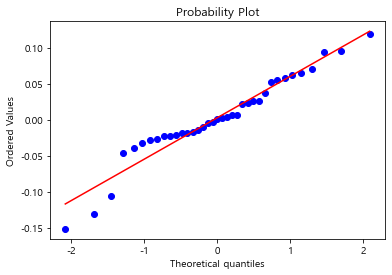

In [88]:
# Q-Q plot
import scipy.stats as stats

stats.probplot(fund_cd_df["월별수익률"], plot=plt)

((array([-2.0844567 , -1.69509426, -1.46257551, -1.28983027, -1.14880688,
         -1.0275498 , -0.91978012, -0.82175965, -0.73106454, -0.646021  ,
         -0.56541462, -0.48832761, -0.41404133, -0.34197479, -0.27164383,
         -0.20263297, -0.13457495, -0.06713532,  0.        ,  0.06713532,
          0.13457495,  0.20263297,  0.27164383,  0.34197479,  0.41404133,
          0.48832761,  0.56541462,  0.646021  ,  0.73106454,  0.82175965,
          0.91978012,  1.0275498 ,  1.14880688,  1.28983027,  1.46257551,
          1.69509426,  2.0844567 ]),
  array([-0.16405616, -0.14066963, -0.11154298, -0.04752799, -0.03947852,
         -0.03266033, -0.02860363, -0.02695128, -0.02296819, -0.02228379,
         -0.02141341, -0.01900847, -0.01874577, -0.01672067, -0.01362365,
         -0.01021521, -0.00377071, -0.00254403,  0.00116464,  0.00291344,
          0.0038929 ,  0.00615547,  0.00615856,  0.02182009,  0.02287824,
          0.02540454,  0.02596044,  0.03633999,  0.05072489,  0.05411409,
 

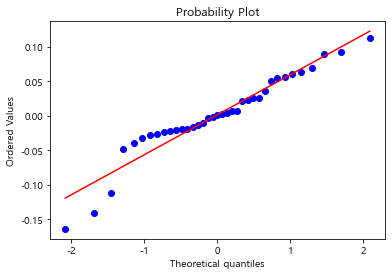

In [89]:
stats.probplot(np.log1p(fund_cd_df["월별수익률"]), plot=plt)

In [90]:
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,3년 표준편차,KOSPI 월별수익률,KOSPI 3년 표준편차,CD금리
0,20190731,892.02,2030.05,201907,-0.038709,0.056548,-0.047202,0.057454,0.011192
1,20190830,868.3,1967.79,201908,-0.026591,0.056548,-0.030669,0.057454,0.011192
2,20190930,925.39,2063.05,201909,0.065749,0.056548,0.048410,0.057454,0.011192
3,20191031,928.09,2083.48,201910,0.002918,0.056548,0.009903,0.057454,0.011192
4,20191129,931.71,2089.8,201911,0.003900,0.056548,0.003033,0.057454,0.011192


In [91]:
# 초과수익률 계산
excess_return = ((fund_cd_df["기준가격"].iloc[-1]-fund_cd_df["기준가격"].iloc[0])/fund_cd_df["기준가격"].iloc[0])-fund_cd_df["CD금리"]
kospi_excess_return = ((fund_cd_df["KOSPI"].iloc[-1]-fund_cd_df["KOSPI"].iloc[0])/fund_cd_df["KOSPI"].iloc[0])-fund_cd_df["CD금리"]
return_std = fund_cd_df["3년 표준편차"]
kospi_return_std = fund_cd_df["KOSPI 3년 표준편차"]

In [92]:
sharpe_df = pd.DataFrame()
sharpe_df["기준월"] = fund_cd_df["기준월"]
sharpe_df["종가"] = fund_cd_df["기준가격"]
sharpe_df["KOSPI 종가"] = fund_cd_df["KOSPI"]
sharpe_df["초과수익률"] = excess_return
sharpe_df["3년 표준편차"] = return_std
sharpe_df["KOSPI 초과수익률"] = kospi_excess_return
sharpe_df["KOSPI 3년 표준편차"] = kospi_return_std
sharpe_df.head()

,기준월,종가,KOSPI 종가,초과수익률,3년 표준편차,KOSPI 초과수익률,KOSPI 3년 표준편차
0,201907,892.02,2030.05,0.09116,0.056548,0.124455,0.057454
1,201908,868.3,1967.79,0.09116,0.056548,0.124455,0.057454
2,201909,925.39,2063.05,0.09116,0.056548,0.124455,0.057454
3,201910,928.09,2083.48,0.09116,0.056548,0.124455,0.057454
4,201911,931.71,2089.8,0.09116,0.056548,0.124455,0.057454


In [93]:
sharpe_df["샤프지수"] = ""
sharpe_df["샤프지수"] = sharpe_df["초과수익률"]/sharpe_df["3년 표준편차"]

In [94]:
sharpe_df["KOSPI 샤프지수"] = ""
sharpe_df["KOSPI 샤프지수"] = sharpe_df["KOSPI 초과수익률"]/sharpe_df["KOSPI 3년 표준편차"]

In [95]:
sharpe_df["CD금리"] = fund_cd_df["CD금리"]

In [96]:
sharpe_df.set_index(["기준월"], inplace=True)
sharpe_df.head()

,종가,KOSPI 종가,초과수익률,3년 표준편차,KOSPI 초과수익률,KOSPI 3년 표준편차,샤프지수,KOSPI 샤프지수,CD금리
기준월,,,,,,,,,
201907,892.02,2030.05,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201908,868.3,1967.79,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201909,925.39,2063.05,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201910,928.09,2083.48,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201911,931.71,2089.8,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192


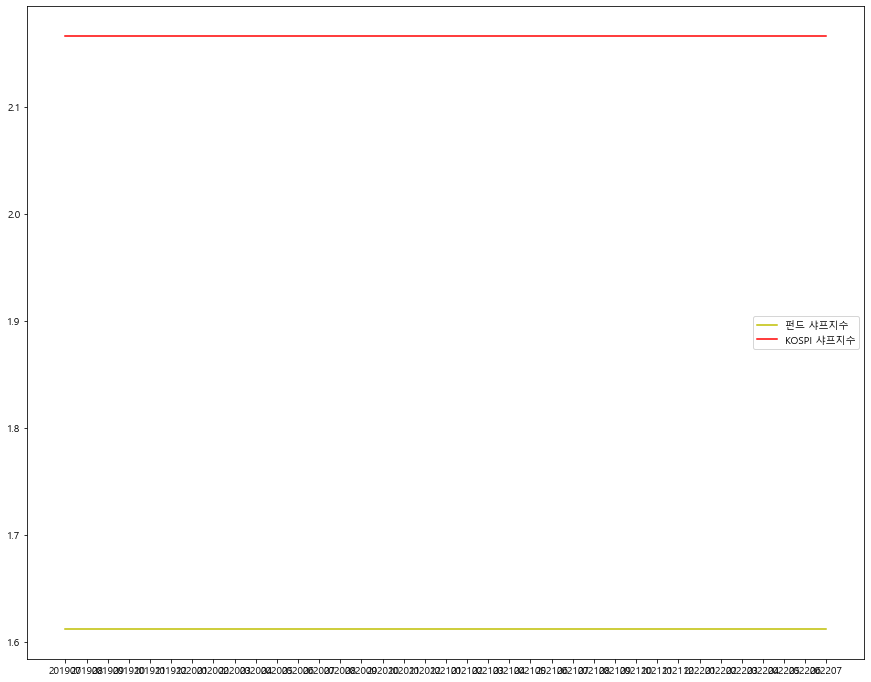

In [97]:
plt.figure(figsize=(15, 12))
plt.plot(sharpe_df["샤프지수"], c="y", label="펀드 샤프지수")
plt.plot(sharpe_df["KOSPI 샤프지수"], c="r", label="KOSPI 샤프지수")
plt.legend()


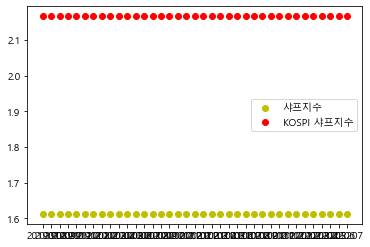

In [98]:
plt.scatter(sharpe_df.index, sharpe_df["샤프지수"], c="y", label="샤프지수")
plt.scatter(sharpe_df.index, sharpe_df["KOSPI 샤프지수"], c="r", label="KOSPI 샤프지수")
plt.legend()
plt.show()

In [99]:
sharpe_df

,종가,KOSPI 종가,초과수익률,3년 표준편차,KOSPI 초과수익률,KOSPI 3년 표준편차,샤프지수,KOSPI 샤프지수,CD금리
기준월,,,,,,,,,
201907,892.02,2030.05,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201908,868.3,1967.79,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201909,925.39,2063.05,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201910,928.09,2083.48,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201911,931.71,2089.8,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
201912,989.23,2197.67,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
202001,967.43,2131.08,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
202002,940.15,1987.01,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192
202003,797.9,1754.64,0.09116,0.056548,0.124455,0.057454,1.612074,2.166167,0.011192


In [ ]:
full_df["펀드"] = ""
if full_df["샤프지수"] > full_df["KOSPI 샤프지수"]:
    if full_df[""]